In [1]:
#Necessary imports
import pandas as pd

In [2]:
#Read df
df = pd.read_csv('airlines_tweets.csv', index_col = 'tweet_id')

In [3]:
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14640 entries, 570306133677760513 to 569587140490866689
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14640 non-null  object 
 1   airline_sentiment_confidence  14640 non-null  float64
 2   negativereason                9178 non-null   object 
 3   negativereason_confidence     10522 non-null  float64
 4   airline                       14640 non-null  object 
 5   airline_sentiment_gold        40 non-null     object 
 6   name                          14640 non-null  object 
 7   negativereason_gold           32 non-null     object 
 8   retweet_count                 14640 non-null  int64  
 9   text                          14640 non-null  object 
 10  tweet_coord                   1019 non-null   object 
 11  tweet_created                 14640 non-null  object 
 12  tweet_location                

In [5]:
#drop all columns except for 'airline_sentiment' and 'text'
columns_to_drop = ['name', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone', 'airline_sentiment_gold', 'negativereason_gold', 'airline', 'retweet_count', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence']
df.drop(columns_to_drop, axis = 1, inplace=True)

#widen columns width to see full text
pd.set_option('display.max_colwidth', None)

df.head()

,airline_sentiment,text
tweet_id,,
570306133677760513,neutral,@VirginAmerica What @dhepburn said.
570301130888122368,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
570301083672813571,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
570301031407624196,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
570300817074462722,negative,@VirginAmerica and it's a really big bad thing about it


negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

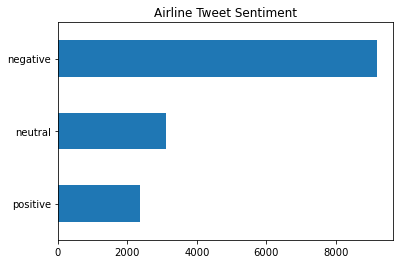

In [6]:
#Make barplot of sentiment value count
plot = df.airline_sentiment.value_counts().sort_values().plot(kind = 'barh', title = 'Airline Tweet Sentiment')
fig = plot.get_figure()
fig.savefig("output.png")


df.airline_sentiment.value_counts()

In [7]:
#Set two examples to test
neg_test = "@SouthwestAir don't you think a 4hr wait time to speak to an actual agent is ridiculous?! My flight was Cancelled Flightled this morning! #Getyourlife"
pos_test = "@united kudos for not Cancelled Flightling flights from DFW this morning. United usually first to panic..."

In [8]:
#test Vader Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def sentiment_test(text):
    test_score = analyser.polarity_scores(text)
    print('Text: ' + text)
    print('Sentiment Score: ' + str(test_score))

sentiment_test(neg_test)
print()
sentiment_test(pos_test)

Text: @SouthwestAir don't you think a 4hr wait time to speak to an actual agent is ridiculous?! My flight was Cancelled Flightled this morning! #Getyourlife
Sentiment Score: {'neg': 0.188, 'neu': 0.812, 'pos': 0.0, 'compound': -0.6229}

Text: @united kudos for not Cancelled Flightling flights from DFW this morning. United usually first to panic...
Sentiment Score: {'neg': 0.132, 'neu': 0.441, 'pos': 0.427, 'compound': 0.7461}


In [9]:
#Function to get sentiment
def get_sentiment(text):
    
    score = analyser.polarity_scores(text)
    
    num_score = score['compound']
    
    if num_score >= 0.05: #positive sentiment
        return 1
    elif (num_score > -0.05) and (num_score < 0.05): #neutral sentiment
        return 0
    else: #negative sentiment
        return -1

#Function to get labels based on the output of get_sentiment
def label_sentiment(sentiment_score):
    if sentiment_score == 1:
        return 'positive'
    if sentiment_score == 0:
        return 'neutral'
    else:
        return 'negative'
    

#Function to get score based on sentiment label
def get_score(sentiment):
    if sentiment == 'positive':
        return 1
    if sentiment == 'neutral':
        return 0
    else:
        return -1

In [10]:
#Apply get_sentiment function to every row of the text column
df['VADER_sentiment_score'] = df['text'].apply(get_sentiment)


#Apply label_sentiment function to get numerical sentiment scores
df['VADER_sentiment_label'] = df['VADER_sentiment_score'].apply(label_sentiment)
df['TRUE_sentiment_score'] = df['airline_sentiment'].apply(get_score)

In [11]:
df.head()

,airline_sentiment,text,VADER_sentiment_score,VADER_sentiment_label,TRUE_sentiment_score
tweet_id,,,,,
570306133677760513,neutral,@VirginAmerica What @dhepburn said.,0,neutral,0
570301130888122368,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,0,neutral,1
570301083672813571,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,0,neutral,0
570301031407624196,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",-1,negative,-1
570300817074462722,negative,@VirginAmerica and it's a really big bad thing about it,-1,negative,-1


(<matplotlib.axes._subplots.AxesSubplot at 0x182ab7a2d0>,
 Text(0.5, 32.08333333333333, 'Predicted'),
 Text(174.58333333333343, 0.5, 'Actual'),
 Text(0.5, 1.0, 'Confusion matrix'))

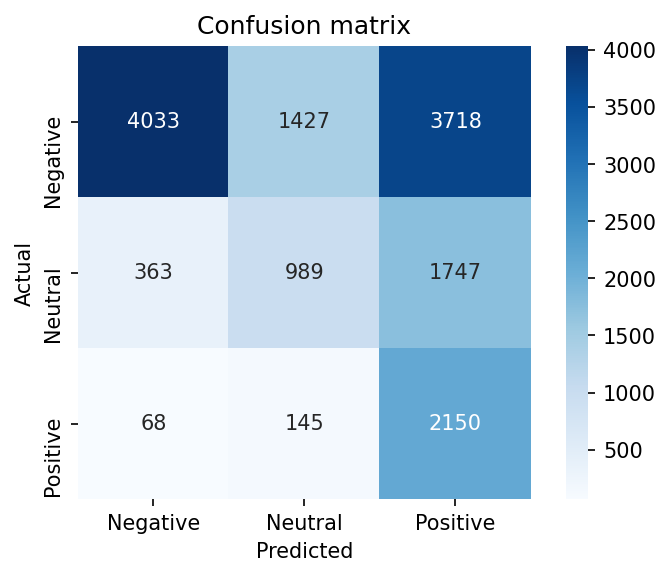

In [12]:
# Print confusion matrix 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def conf_matrix(sent_true, pred_sent):
    
    confusion = confusion_matrix(sent_true, pred_sent)
    plt.figure(dpi=150)
    
    xticks = ['Negative', 'Neutral', 'Positive']
    yticks = ['Negative', 'Neutral', 'Positive']
           
    
    fig = sns.heatmap(confusion, cmap = plt.cm.Blues, annot=True, square=True, fmt='d',
                       xticklabels = xticks,
                       yticklabels = yticks)
     
    xlab = plt.xlabel('Predicted')
    ylab = plt.ylabel('Actual')
    title = plt.title('Confusion matrix')
    
    return fig, xlab, ylab, title


#Confusion Matrix for VADER
conf_matrix(df['TRUE_sentiment_score'], df['VADER_sentiment_score'])


In [13]:
#Print Classification Report
from sklearn.metrics import classification_report

print(classification_report(df['TRUE_sentiment_score'], df['VADER_sentiment_score']))

              precision    recall  f1-score   support

          -1       0.90      0.44      0.59      9178
           0       0.39      0.32      0.35      3099
           1       0.28      0.91      0.43      2363

    accuracy                           0.49     14640
   macro avg       0.52      0.56      0.46     14640
weighted avg       0.69      0.49      0.51     14640



In [14]:
#Check where VADER misclassifies tweets
pd.set_option('display.max_colwidth', None)
df_small = df.drop(['airline_sentiment', 'VADER_sentiment_label'], axis=1)

In [15]:
df_small.head(50)

,text,VADER_sentiment_score,TRUE_sentiment_score
tweet_id,,,
570306133677760513,@VirginAmerica What @dhepburn said.,0,0
570301130888122368,@VirginAmerica plus you've added commercials to the experience... tacky.,0,1
570301083672813571,@VirginAmerica I didn't today... Must mean I need to take another trip!,0,0
570301031407624196,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",-1,-1
570300817074462722,@VirginAmerica and it's a really big bad thing about it,-1,-1
570300767074181121,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,-1,-1
570300616901320704,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",1,1
570300248553349120,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",1,0
570299953286942721,"@virginamerica Well, I didn't…but NOW I DO! :-D",1,1


In [16]:
# Examples of correct classification
print(df_small.iloc[18])
print()
print(df_small.iloc[30])

text                     I ❤️ flying @VirginAmerica. ☺️👍
VADER_sentiment_score                                  1
TRUE_sentiment_score                                   1
Name: 570270684619923457, dtype: object

text                     @VirginAmerica hi! I just bked a cool birthday trip with you, but i can't add my elevate no. cause i entered my middle name during Flight Booking Problems 😢
VADER_sentiment_score                                                                                                                                                              -1
TRUE_sentiment_score                                                                                                                                                               -1
Name: 570114021854212096, dtype: object


In [17]:
# Examples of misclassification
print(df_small.iloc[-6])
print()
print(df_small.iloc[-44])

text                     @AmericanAir right on cue with the delays👌
VADER_sentiment_score                                             1
TRUE_sentiment_score                                             -1
Name: 569587691626622976, dtype: object

text                     @AmericanAir we've been on hold for hours.
VADER_sentiment_score                                             0
TRUE_sentiment_score                                             -1
Name: 569593346223579137, dtype: object
